In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings("ignore")


In [338]:
df_train=pd.read_csv("/content/Titanic_train.csv")
df_test=pd.read_csv("/content/Titanic_test.csv")
df_train["code"]=1
df_test["code"]=2
df=pd.concat([df_train,df_test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,2
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,2
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,2


In [339]:
# PassengerId: Unique identifier for each passenger.
# Survived: Indicates whether the passenger survived (1) or not (0).
# Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). A proxy for socio-economic status.
# Name: Passenger's name.
# Sex: Passenger's gender (male or female).
# Age: Passenger's age in years.
# SibSp: Number of siblings / spouses aboard the Titanic.
# Parch: Number of parents / children aboard the Titanic.
# Ticket: Ticket number.
# Fare: Passenger fare.
# Cabin: Cabin number.
# Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
# Code: A column  added to distinguish between training and test data (1 for training, 2 for test).

In [340]:
df["code"].value_counts()

,count
code,
1,891
2,418


In [341]:
df1=df.copy()

In [342]:
df[df.duplicated()].shape

(0, 13)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  code         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [344]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [345]:
df.isnull().sum()*100/len(df)

,0
PassengerId,0.000000
Survived,31.932773
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.091673
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.076394


In [346]:
#77.5% missing values in cabin column,droping the cabin column
df.drop('Cabin',inplace=True,axis=1)

In [347]:
df["Survived"].fillna(df["Survived"].mode()[0],inplace=True)
df["Age"].fillna(df["Age"].median(),inplace=True)
df["Fare"].fillna(df["Fare"].median(),inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [348]:
df.isnull().sum()*100/len(df)

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [349]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,2
414,1306,0.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,2
415,1307,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,2
416,1308,0.0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,2


In [350]:
#drop the unimportant columns
df.drop(["PassengerId","Name","Ticket","Embarked"],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)


In [351]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,code
0,0.0,3,male,22.0,1,0,7.2500,1
1,1.0,1,female,38.0,1,0,71.2833,1
2,1.0,3,female,26.0,0,0,7.9250,1
3,1.0,1,female,35.0,1,0,53.1000,1
4,0.0,3,male,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
1304,0.0,3,male,28.0,0,0,8.0500,2
1305,0.0,1,female,39.0,0,0,108.9000,2
1306,0.0,3,male,38.5,0,0,7.2500,2
1307,0.0,3,male,28.0,0,0,8.0500,2


In [352]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,code
0,0.0,3,1,22.0,1,0,7.2500,1
1,1.0,1,0,38.0,1,0,71.2833,1
2,1.0,3,0,26.0,0,0,7.9250,1
3,1.0,1,0,35.0,1,0,53.1000,1
4,0.0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
1304,0.0,3,1,28.0,0,0,8.0500,2
1305,0.0,1,0,39.0,0,0,108.9000,2
1306,0.0,3,1,38.5,0,0,7.2500,2
1307,0.0,3,1,28.0,0,0,8.0500,2


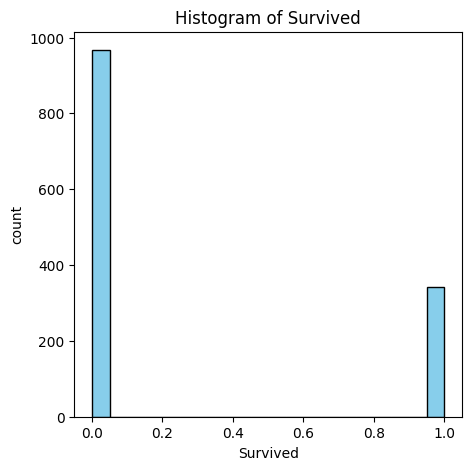

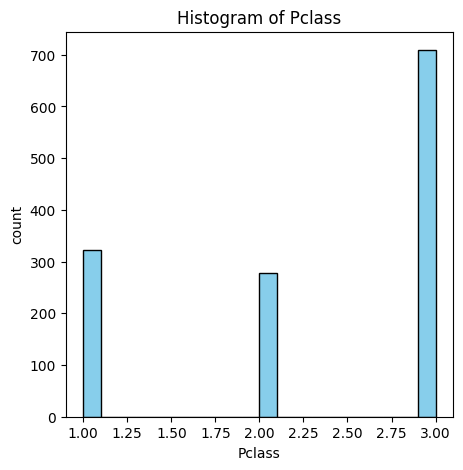

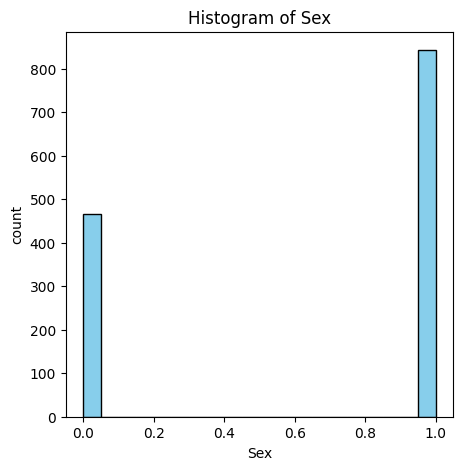

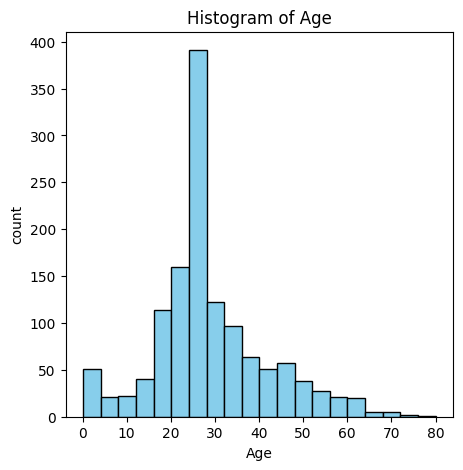

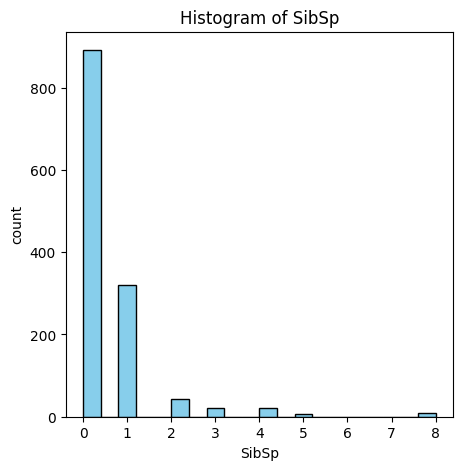

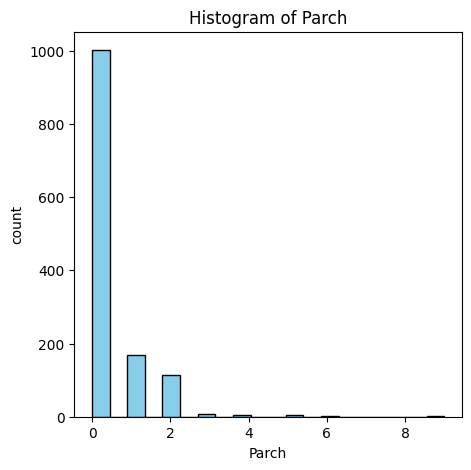

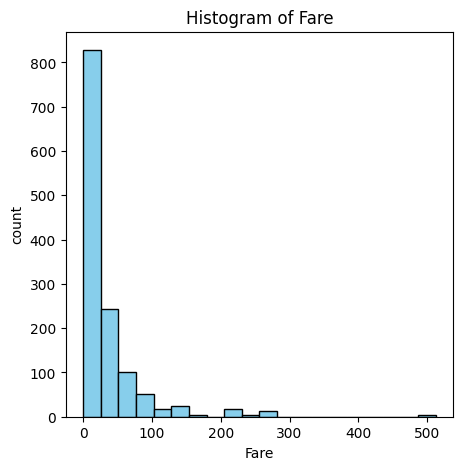

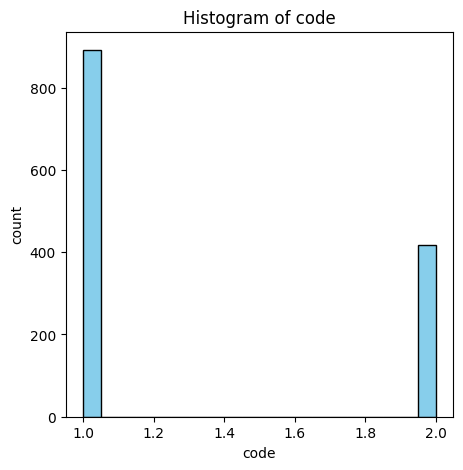

In [353]:
#Histograms
for col in df:
  plt.figure(figsize=(5,5))
  plt.hist(df[col],bins=20,color="skyblue",edgecolor="black")
  plt.title(f"Histogram of {col}")
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

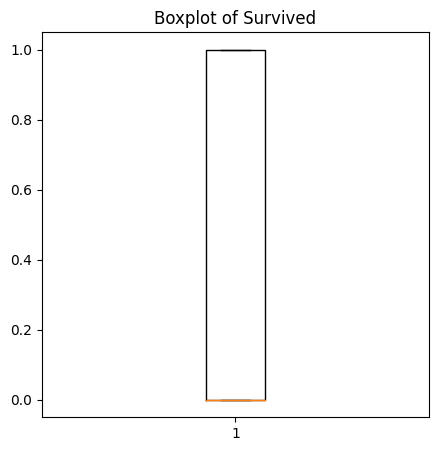

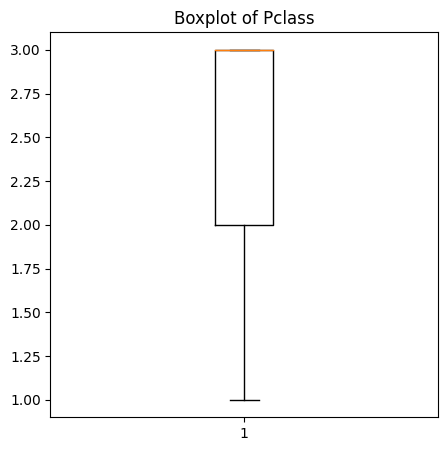

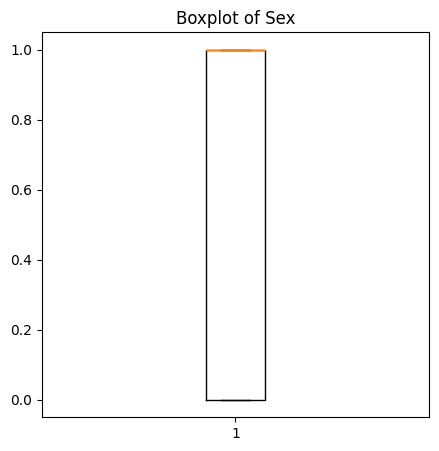

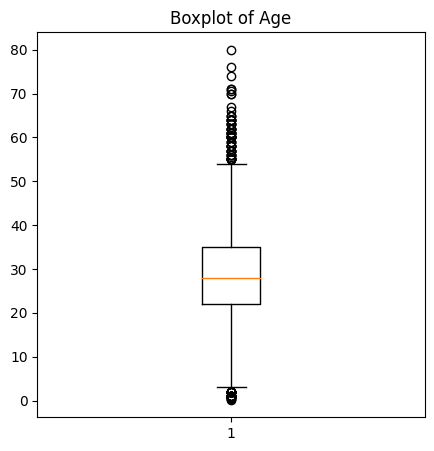

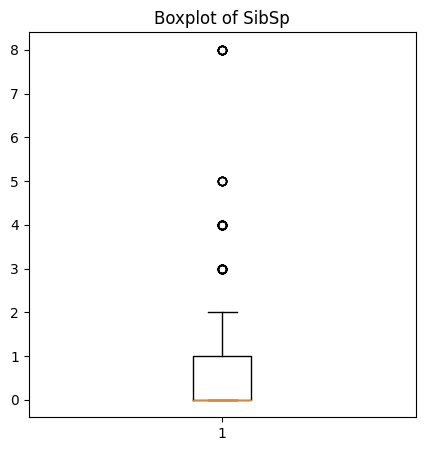

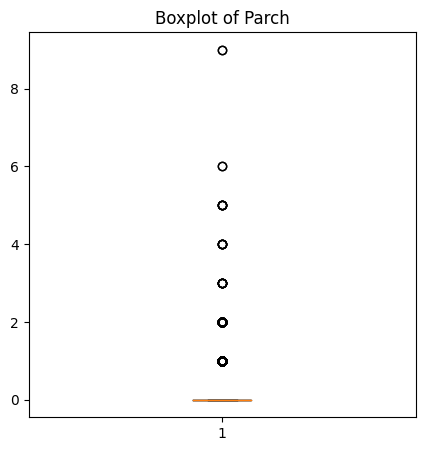

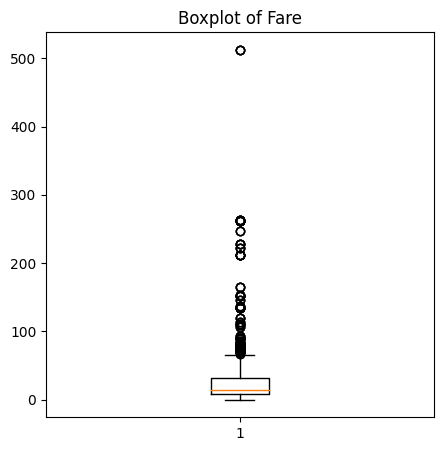

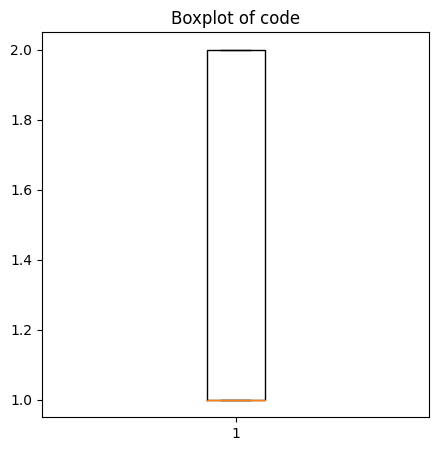

In [354]:
#Boxplots
for col in df:
  plt.figure(figsize=(5,5))
  plt.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [355]:
#finding outliers using zscores
from scipy import stats
z_scores=np.abs(stats.zscore(df))
outliers=np.where(z_scores>3)
outliers

(array([  13,   16,   25,   27,   50,   59,   68,   71,   86,   88,   96,
         116,  118,  119,  159,  164,  167,  171,  180,  182,  201,  233,
         258,  261,  266,  278,  299,  311,  324,  341,  360,  377,  380,
         386,  437,  438,  438,  480,  493,  527,  541,  542,  557,  567,
         610,  630,  638,  672,  678,  679,  683,  686,  689,  700,  716,
         730,  736,  737,  742,  745,  774,  779,  787,  792,  813,  824,
         846,  850,  851,  858,  863,  885,  915,  915,  944,  946,  950,
         955,  960,  960,  965,  966,  972,  987, 1005, 1023, 1030, 1031,
        1033, 1033, 1045, 1047, 1065, 1069, 1075, 1079, 1093, 1105, 1109,
        1215, 1233, 1234, 1251, 1256, 1266, 1270, 1298]),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5, 5, 6, 6, 4, 6, 6, 5, 6, 6, 6

In [356]:
#finding outliers using IQR
Q1=df["Fare"].quantile(0.25)
Q3=df["Fare"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df["Fare"]<lower_bound) |\
            (df["Fare"]>upper_bound)]
outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,code
1,1.0,1,0,38.0,1,0,71.2833,1
27,0.0,1,1,19.0,3,2,263.0000,1
31,1.0,1,0,28.0,1,0,146.5208,1
34,0.0,1,1,28.0,1,0,82.1708,1
52,1.0,1,0,49.0,1,0,76.7292,1
...,...,...,...,...,...,...,...,...
1288,0.0,1,0,48.0,1,1,79.2000,2
1291,0.0,1,0,30.0,0,0,164.8667,2
1298,0.0,1,1,50.0,1,1,211.5000,2
1302,0.0,1,0,37.0,1,0,90.0000,2


In [357]:
from sklearn.ensemble import IsolationForest
iso_forest=IsolationForest(contamination=0.05)
outliers=iso_forest.fit_predict(df)
final_df=df[outliers!=-1]
final_df.reset_index(drop=True,inplace=True)

In [358]:
final_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,code
0,0.0,3,1,22.0,1,0,7.2500,1
1,1.0,1,0,38.0,1,0,71.2833,1
2,1.0,3,0,26.0,0,0,7.9250,1
3,1.0,1,0,35.0,1,0,53.1000,1
4,0.0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
1238,0.0,3,1,28.0,0,0,8.0500,2
1239,0.0,1,0,39.0,0,0,108.9000,2
1240,0.0,3,1,38.5,0,0,7.2500,2
1241,0.0,3,1,28.0,0,0,8.0500,2


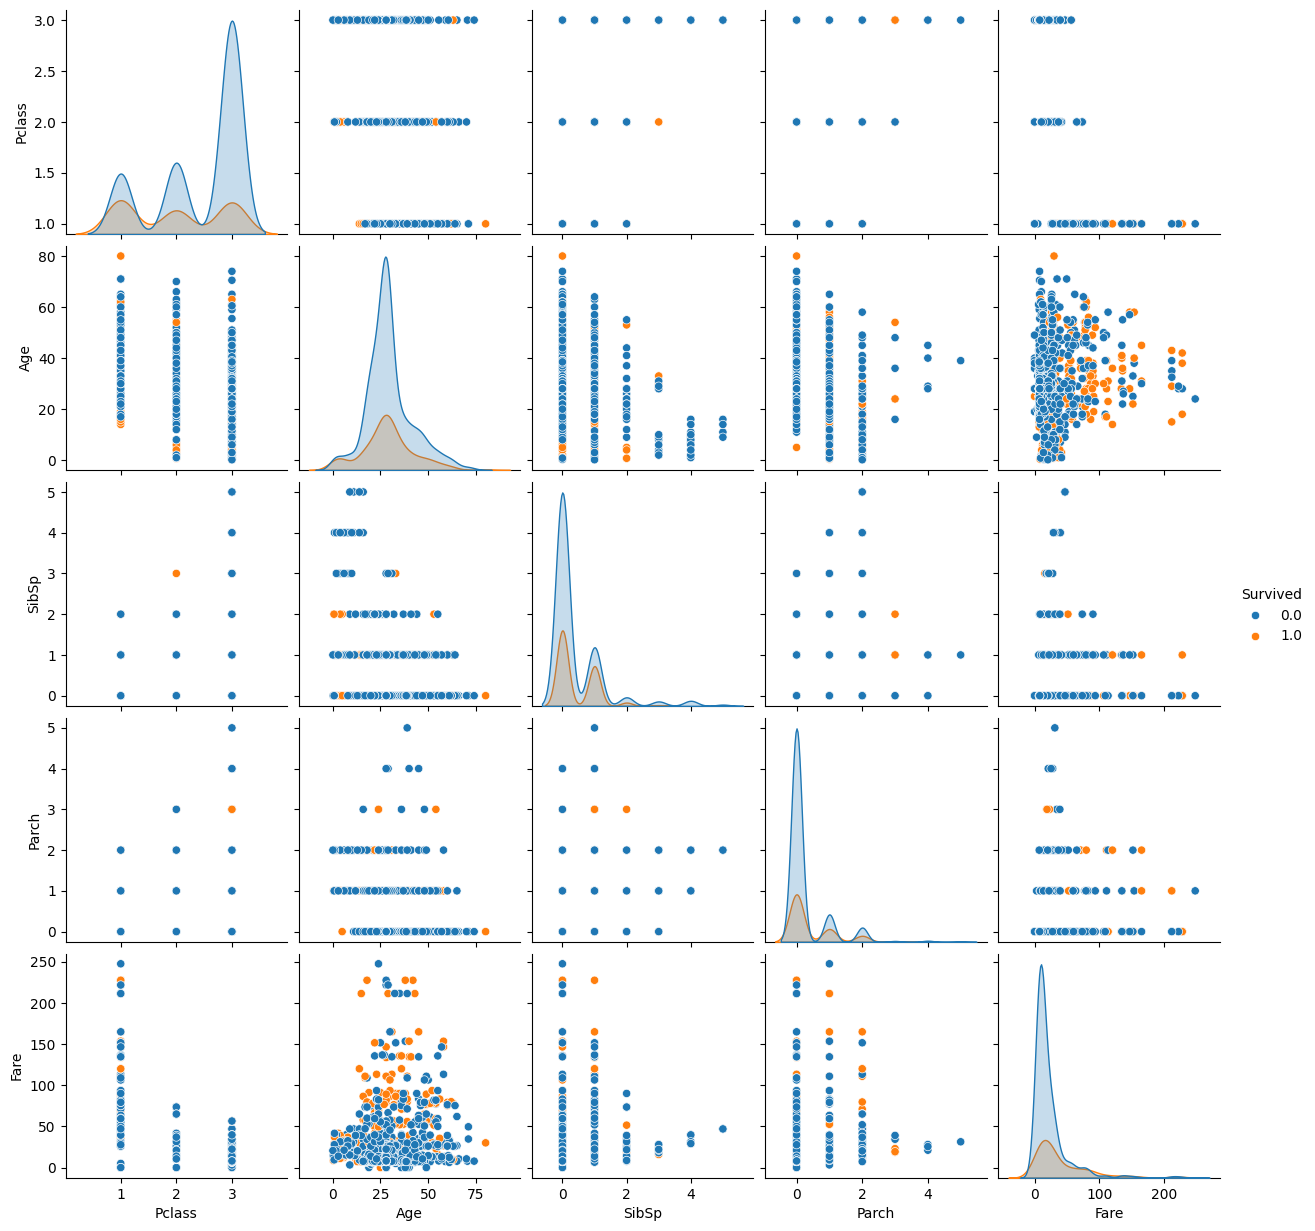

In [359]:
# Scatter plots
sns.pairplot(final_df,hue='Survived', vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
plt.show()


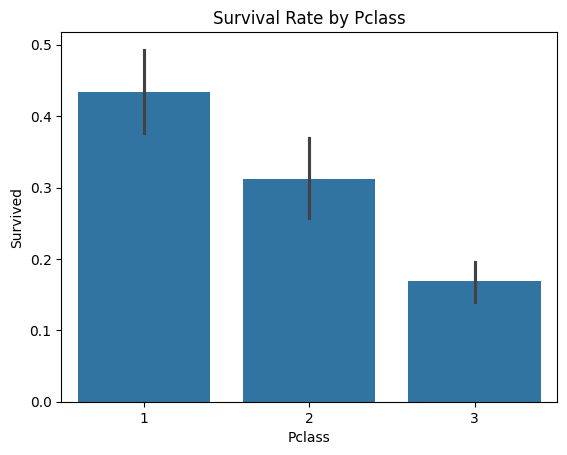

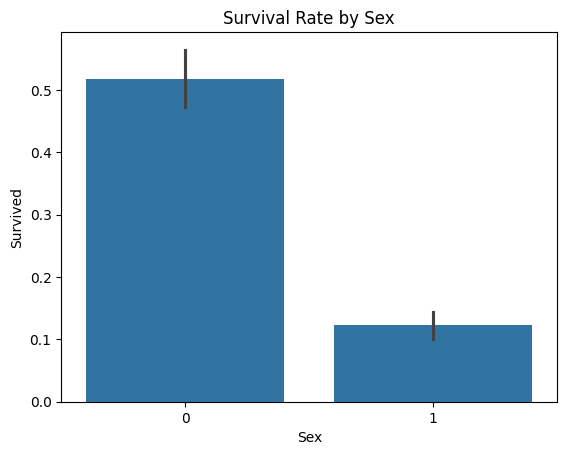

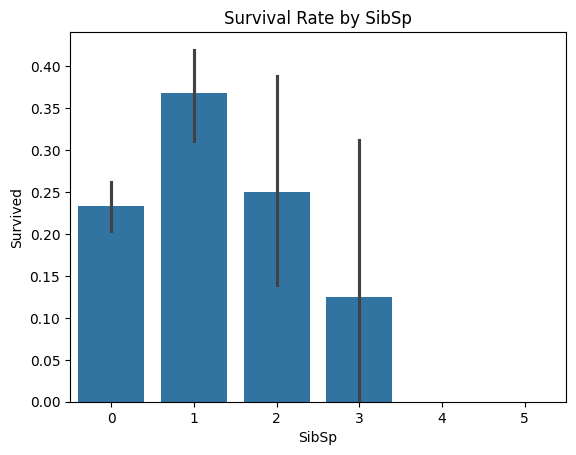

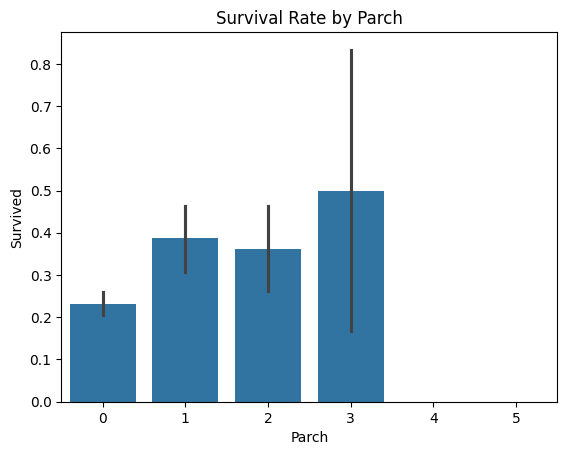

In [360]:
# Bar plots
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch']

for feature in categorical_features:
  sns.barplot(x=feature, y='Survived', data=final_df)
  plt.title(f'Survival Rate by {feature}')
  plt.show()


In [361]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
final_df[["Age"]] = sc.fit_transform(final_df[["Age"]])
final_df[["Fare"]] = sc.fit_transform(final_df[["Fare"]])
final_df[["SibSp"]] = sc.fit_transform(final_df[["SibSp"]])
final_df[["Parch"]] = sc.fit_transform(final_df[["Parch"]])

In [369]:
final_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,code
0,0.0,3,1,-0.587906,0.778740,-0.446831,-0.579664,1
1,1.0,1,0,0.701032,0.778740,-0.446831,1.305627,1
2,1.0,3,0,-0.265672,-0.518812,-0.446831,-0.559790,1
3,1.0,1,0,0.459356,0.778740,-0.446831,0.770268,1
4,0.0,3,1,0.459356,-0.518812,-0.446831,-0.556110,1
...,...,...,...,...,...,...,...,...
1238,0.0,3,1,-0.104554,-0.518812,-0.446831,-0.556110,2
1239,0.0,1,0,0.781590,-0.518812,-0.446831,2.413151,2
1240,0.0,3,1,0.741311,-0.518812,-0.446831,-0.579664,2
1241,0.0,3,1,-0.104554,-0.518812,-0.446831,-0.556110,2


In [370]:
x=final_df.iloc[:,0:7]
y=final_df["code"]

In [371]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


In [372]:
!pip install xgboost

In [374]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_train = le.fit_transform(y_train)

# Now create and fit your model
model = XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.5, gamma=0.5, objective="binary:logistic")
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [377]:
pred=model.predict(x_test)
# Transform y_test using the same LabelEncoder instance
y_test_transformed = le.transform(y_test)
print("Accuracy score:",accuracy_score(y_test_transformed, pred))
print("precision score:",precision_score(y_test_transformed, pred))
print("recall score:",recall_score(y_test_transformed, pred))
print("F1 score:",f1_score(y_test_transformed, pred))



Accuracy score: 0.7590361445783133
precision score: 0.7058823529411765
recall score: 0.32432432432432434
F1 score: 0.44444444444444453


In [379]:


!pip install lightgbm
import lightgbm as lgb

# Assuming x_train, y_train, x_test are already defined

# Create LightGBM dataset
train_data = lgb.Dataset(x_train, label=y_train)

# Set parameters (you might want to tune these)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
num_round = 100  # Number of boosting rounds
bst = lgb.train(params, train_data, num_round)

# Make predictions
y_pred = bst.predict(x_test)
y_pred_binary = [round(value) for value in y_pred]  # Convert probabilities to binary predictions




[LightGBM] [Info] Number of positive: 313, number of negative: 681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 994, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.314889 -> initscore=-0.777359
[LightGBM] [Info] Start training from score -0.777359
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [380]:
# Evaluate (assuming y_test_transformed is defined)
print("Accuracy score:",accuracy_score(y_test_transformed, y_pred_binary))
print("precision score:",precision_score(y_test_transformed, y_pred_binary))
print("recall score:",recall_score(y_test_transformed, y_pred_binary))
print("F1 score:",f1_score(y_test_transformed, y_pred_binary))

Accuracy score: 0.7028112449799196
precision score: 0.5
recall score: 0.32432432432432434
F1 score: 0.39344262295081966


In [383]:
#cross-validation and hyperparameter tuning to best model performance.

from sklearn.model_selection import GridSearchCV, StratifiedKFold

# XGBoost
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.1, 0.3, 0.5],
    'gamma': [0, 0.25, 0.5]
}

# Initialize XGBoost model
xgb_model = XGBClassifier()

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                           scoring='accuracy', cv=skf, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search_xgb.fit(x_train, y_train)

# Get the best parameters and best score for XGBoost
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_
print("Best Parameters for XGBoost:", best_params_xgb)
print("Best Accuracy Score for XGBoost:", best_score_xgb)

# Train the best XGBoost model
best_xgb_model = XGBClassifier(**best_params_xgb)
best_xgb_model.fit(x_train, y_train)

# Make predictions using the best XGBoost model
y_pred_xgb = best_xgb_model.predict(x_test)

# Evaluate the best XGBoost model
print("Accuracy score for best XGBoost model:", accuracy_score(y_test_transformed, y_pred_xgb))



# LightGBM
# Define the parameter grid for LightGBM
param_grid_lgb = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.05, 0.1, 0.2],
    'feature_fraction': [0.7, 0.9, 1.0]
}

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', boosting_type='gbdt')

# Initialize GridSearchCV for LightGBM
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb,
                           scoring='accuracy', cv=skf, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search_lgb.fit(x_train, y_train)

# Get the best parameters and best score for LightGBM
best_params_lgb = grid_search_lgb.best_params_
best_score_lgb = grid_search_lgb.best_score_
print("Best Parameters for LightGBM:", best_params_lgb)
print("Best Accuracy Score for LightGBM:", best_score_lgb)

# Train the best LightGBM model
best_lgb_model = lgb.LGBMClassifier(**best_params_lgb)
best_lgb_model.fit(x_train, y_train)

# Make predictions using the best LightGBM model
y_pred_lgb = best_lgb_model.predict(x_test)

# Evaluate the best LightGBM model
print("Accuracy score for best LightGBM model:", accuracy_score(y_test_transformed, y_pred_lgb))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGBoost: {'gamma': 0.5, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100}
Best Accuracy Score for XGBoost: 0.7404395715953506
Accuracy score for best XGBoost model: 0.7188755020080321
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 313, number of negative: 681
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 994, number of used features: 7

In [385]:
#Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

# Evaluate XGBoost
print("XGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test_transformed, y_pred_xgb))
print("Precision:", precision_score(y_test_transformed, y_pred_xgb))
print("Recall:", recall_score(y_test_transformed, y_pred_xgb))
print("F1-score:", f1_score(y_test_transformed, y_pred_xgb))
print("\n")

# Evaluate LightGBM
print("LightGBM Metrics:")
print("Accuracy:", accuracy_score(y_test_transformed, y_pred_lgb))
print("Precision:", precision_score(y_test_transformed, y_pred_lgb))
print("Recall:", recall_score(y_test_transformed, y_pred_lgb))
print("F1-score:", f1_score(y_test_transformed, y_pred_lgb))


XGBoost Metrics:
Accuracy: 0.7188755020080321
Precision: 0.5416666666666666
Recall: 0.35135135135135137
F1-score: 0.4262295081967213


LightGBM Metrics:
Accuracy: 0.7068273092369478
Precision: 0.5106382978723404
Recall: 0.32432432432432434
F1-score: 0.39669421487603307


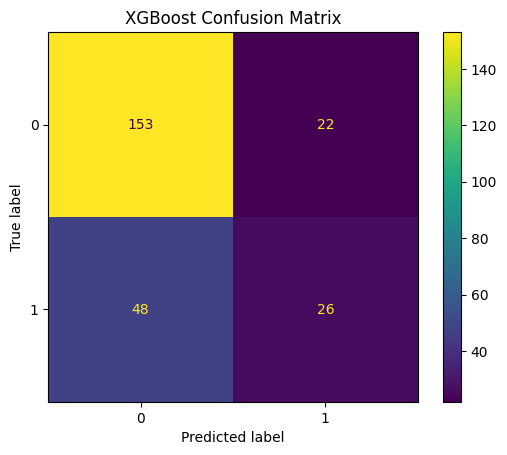

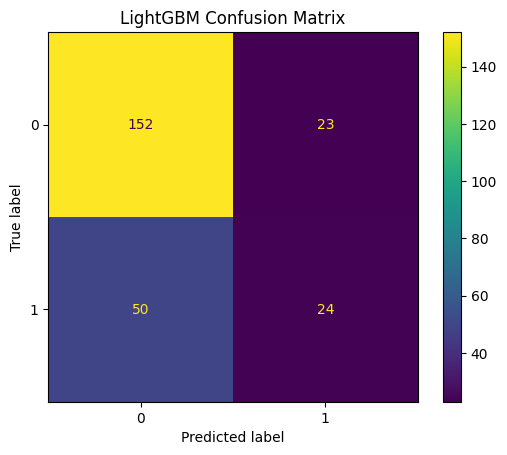

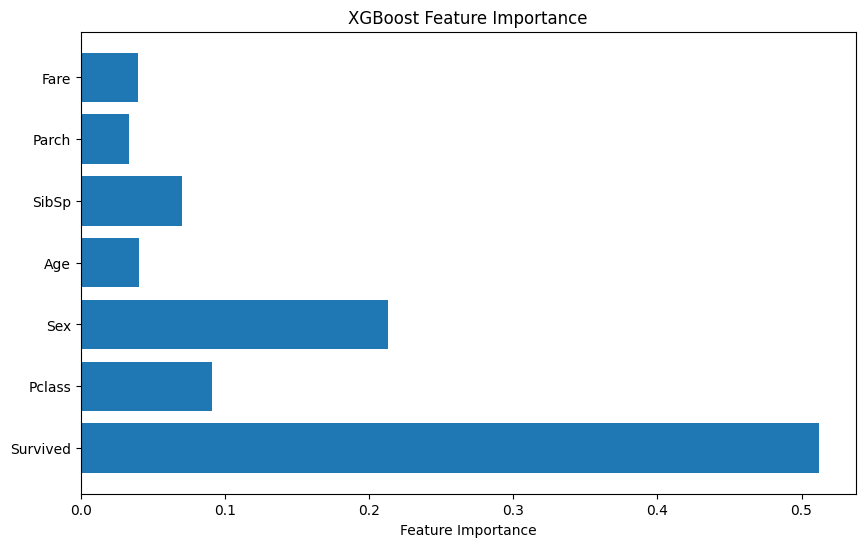

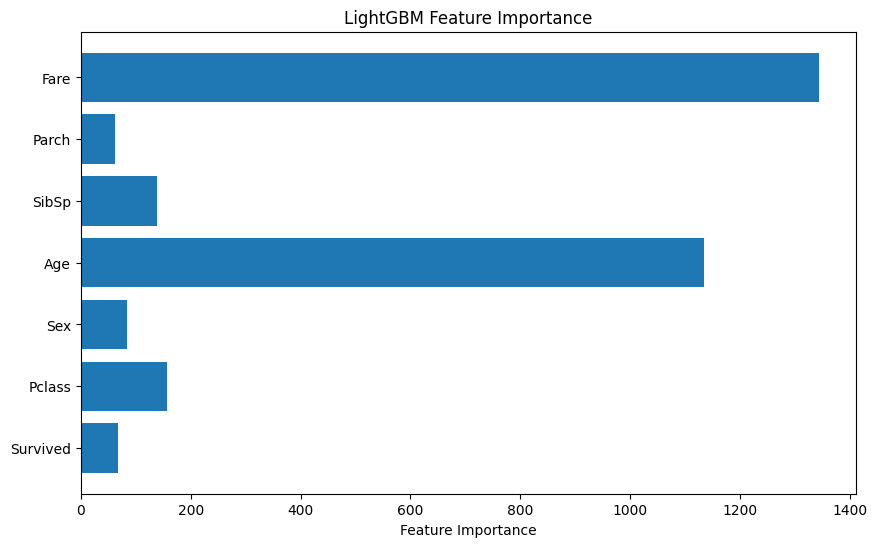

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7


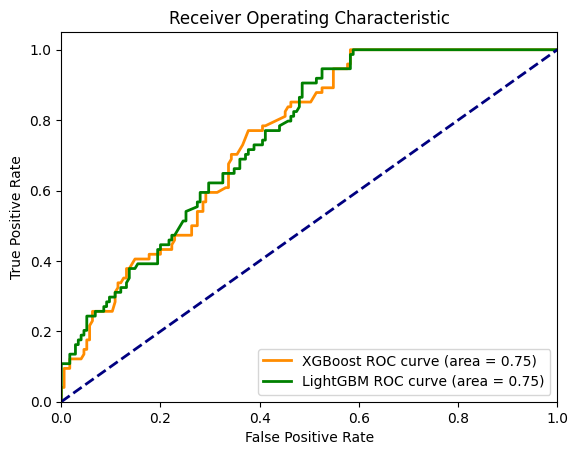

In [386]:
# Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

# Confusion Matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test_transformed, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

# LightGBM Confusion Matrix
cm_lgb = confusion_matrix(y_test_transformed, y_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb)
disp_lgb.plot()
plt.title('LightGBM Confusion Matrix')
plt.show()

# Feature Importance
# XGBoost Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(x_train.columns, best_xgb_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

# LightGBM Feature Importance (if applicable)
if hasattr(best_lgb_model, 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    plt.barh(x_train.columns, best_lgb_model.feature_importances_)
    plt.xlabel('Feature Importance')
    plt.title('LightGBM Feature Importance')
    plt.show()
else:
    print("LightGBM model doesn't have 'feature_importances_' attribute.")

# ROC Curves and AUC
from sklearn.metrics import roc_curve, auc

# XGBoost ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_transformed, best_xgb_model.predict_proba(x_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# LightGBM ROC Curve
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test_transformed, best_lgb_model.predict_proba(x_test)[:, 1])
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC Curves
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_lgb, tpr_lgb, color='green', lw=2, label='LightGBM ROC curve (area = %0.2f)' % roc_auc_lgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#Xtreme gradient boosting model is better than Light gradient bossting model